In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Expanding Dimention
Expanding dimentions of both training and testing image batch, This is performed to satisfy input requirnment of CNN

In [3]:
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

# Normalization

In [4]:
train_images, test_images = train_images/255.0, test_images/255.0

# One-Hot Encoding labels

In [5]:
print("labels befor Encoding\n", train_labels[:10], '\n', test_labels[:10])

labels befor Encoding
 [5 0 4 1 9 2 1 3 1 4] 
 [7 2 1 0 4 1 4 9 5 9]


In [6]:
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

In [7]:
print("labels after Encoding\n", train_labels[:10], '\n', test_labels[:10])

labels after Encoding
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Create, Train and Test Model

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = "softmax")
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 621us/sample - loss: 0.2071 - acc: 0.9366 - val_loss: 0.0797 - val_acc: 0.9774
Epoch 2/10
60000/60000 [==============================] - 45s 742us/sample - loss: 0.0734 - acc: 0.9773 - val_loss: 0.0512 - val_acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 41s 688us/sample - loss: 0.0516 - acc: 0.9843 - val_loss: 0.0639 - val_acc: 0.9810
Epoch 4/10
60000/60000 [==============================] - 33s 555us/sample - loss: 0.0409 - acc: 0.9867 - val_loss: 0.0452 - val_acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 33s 546us/sample - loss: 0.0324 - acc: 0.9901 - val_loss: 0.0465 - val_acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 40s 666us/sample - loss: 0.0255 - acc: 0.9919 - val_loss: 0.0469 - val_acc: 0.9863
Epoch 7/10
60000/60000 [==============================] - 39s 655us/sample - loss: 0.0233 - acc: 0.9926 

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

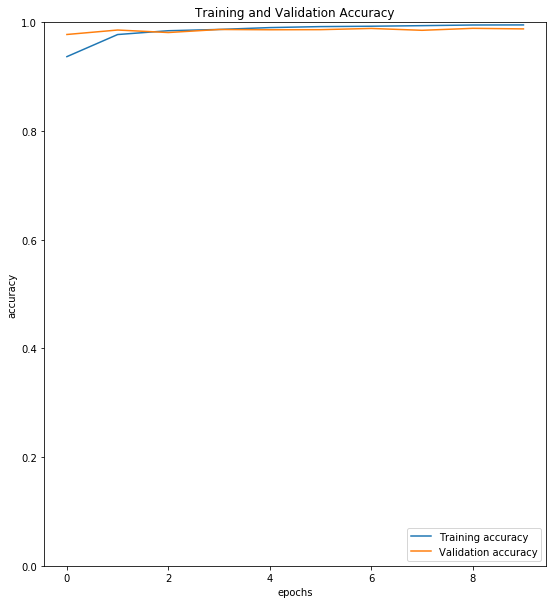

In [12]:
plt.figure(figsize = (9,10))
plt.plot(acc, label = "Training accuracy")
plt.plot(val_acc, label = "Validation accuracy")
plt.legend(loc = "lower right")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and Validation Accuracy")
plt.ylim([0,1])
plt.savefig("./Results/CNN_Training_Validation_accuracy1.png")
plt.show()

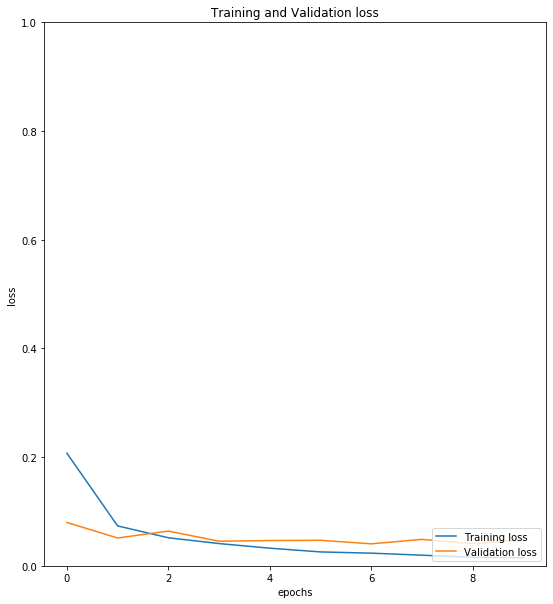

In [13]:
plt.figure(figsize = (9,10))
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label = "Validation loss")
plt.legend(loc = "lower right")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training and Validation loss")
plt.ylim([0,1])
plt.savefig("./Results/CNN_Training_Validation_Loss1.png")
plt.show()